In [11]:
# Installing stuff
!pip install yfinance
!pip install matplotlib
!pip install scikit-learn
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Gathering all Historical Data into a Data Frame
import yfinance as yf

sp500 = yf.Ticker("^GSPC")

In [3]:
sp500 = sp500.history(period="max")

In [4]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-05-15 00:00:00-04:00,4126.649902,4141.250000,4110.270020,4136.279785,3562170000,0.0,0.0
2023-05-16 00:00:00-04:00,4127.950195,4135.540039,4109.859863,4109.899902,3654200000,0.0,0.0
2023-05-17 00:00:00-04:00,4122.850098,4164.669922,4113.620117,4158.770020,4039080000,0.0,0.0


In [5]:
# Cleaning & Visualizing the data

del sp500["Dividends"]
del sp500["Stock Splits"]

<Axes: xlabel='Date'>

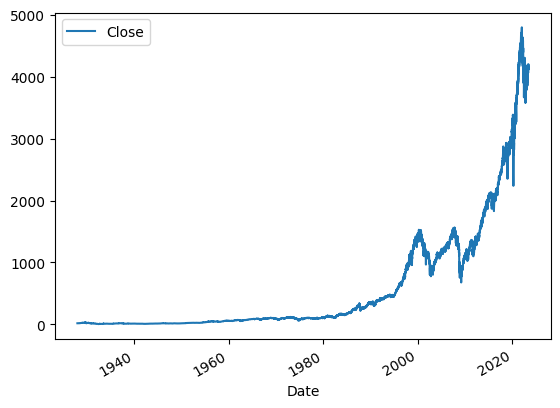

In [6]:
sp500.plot.line(y="Close", use_index=True)

In [7]:
# Setting target for ML
sp500["Tomorrow"] = sp500["Close"].shift(-1)
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [8]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-05-15 00:00:00-04:00,4126.649902,4141.250000,4110.270020,4136.279785,3562170000,4109.899902,0
2023-05-16 00:00:00-04:00,4127.950195,4135.540039,4109.859863,4109.899902,3654200000,4158.770020,1
2023-05-17 00:00:00-04:00,4122.850098,4164.669922,4113.620117,4158.770020,4039080000,4198.049805,1


In [9]:
# Training an Initial ML model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [12]:
# Applying Accuracy metric & checking precision
from sklearn.metrics import precision_score
import pandas as pd

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.45454545454545453

<Axes: xlabel='Date'>

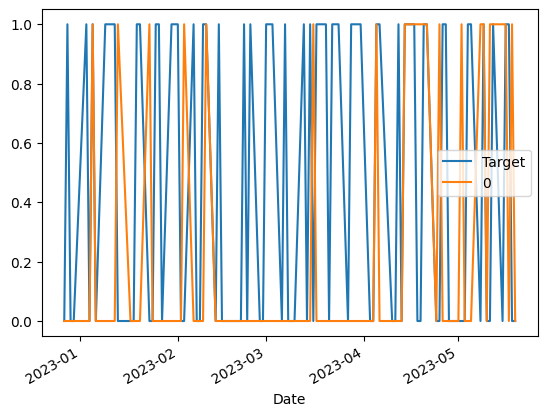

In [13]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

In [14]:
# Defining predict & backtesting methods
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [15]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [16]:
# backtest call
predictions = backtest(sp500, model, predictors)

In [17]:
# Checking counts
predictions["Predictions"].value_counts()

Predictions
0    12138
1     9323
Name: count, dtype: int64

In [18]:
# Checking precision
precision_score(predictions["Target"], predictions["Predictions"])

0.516571918910222

In [19]:
# Checking persentages
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.525884
0    0.474116
Name: count, dtype: float64

In [20]:
# Adding additional predictors to the model
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors+= [ratio_column, trend_column]

In [21]:
# Droppng blank/nan rows, (i.e first row of frame won't have any rows above it so it'll be nan.)
sp500 = sp500.dropna(subset=sp500.columns[sp500.columns != "Tomorrow"])

In [22]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1931-12-29 00:00:00-05:00,7.960000,7.960000,7.960000,7.960000,0,8.100000,1,1.012723,1.0,0.996994,3.0,0.821282,24.0,0.582074,105.0,0.394305,521.0
1931-12-30 00:00:00-05:00,8.100000,8.100000,8.100000,8.100000,0,8.120000,1,1.008717,2.0,1.019381,3.0,0.837787,25.0,0.593657,105.0,0.401432,521.0
1931-12-31 00:00:00-05:00,8.120000,8.120000,8.120000,8.120000,0,7.560000,0,1.001233,2.0,1.017544,4.0,0.842149,25.0,0.596489,105.0,0.402615,522.0
1932-01-04 00:00:00-05:00,7.560000,7.560000,7.560000,7.560000,0,7.550000,0,0.964286,1.0,0.956962,3.0,0.785781,25.0,0.556754,104.0,0.375034,522.0
1932-01-05 00:00:00-05:00,7.550000,7.550000,7.550000,7.550000,0,8.080000,1,0.999338,0.0,0.960804,3.0,0.787963,24.0,0.557255,104.0,0.374726,521.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-15 00:00:00-04:00,4126.649902,4141.250000,4110.270020,4136.279785,3562170000,4109.899902,0,1.001477,1.0,1.001628,2.0,1.021520,30.0,1.043435,115.0,1.103909,533.0
2023-05-16 00:00:00-04:00,4127.950195,4135.540039,4109.859863,4109.899902,3654200000,4158.770020,1,0.996801,1.0,0.995687,2.0,1.014876,30.0,1.036758,114.0,1.096486,533.0
2023-05-17 00:00:00-04:00,4122.850098,4164.669922,4113.620117,4158.770020,4039080000,4198.049805,1,1.005910,1.0,1.006496,2.0,1.026262,31.0,1.048837,115.0,1.109117,534.0


In [23]:
# Updating the model
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [24]:
# updating predict()
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [25]:
# backtest call
predictions = backtest(sp500, model, new_predictors)

In [26]:
# Checking counts
predictions["Predictions"].value_counts()

Predictions
0.0    17352
1.0     3109
Name: count, dtype: int64

In [27]:
# Checking precision
precision_score(predictions["Target"], predictions["Predictions"])

0.5966548729495015

In [28]:
# Checking persentages
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.528567
0    0.471433
Name: count, dtype: float64

In [29]:
predictions

,Target,Predictions
Date,,
1942-01-07 00:00:00-05:00,0,0.0
1942-01-08 00:00:00-05:00,0,0.0
1942-01-09 00:00:00-05:00,0,0.0
1942-01-12 00:00:00-05:00,1,0.0
1942-01-13 00:00:00-05:00,0,0.0
...,...,...
2023-05-15 00:00:00-04:00,0,0.0
2023-05-16 00:00:00-04:00,1,0.0
2023-05-17 00:00:00-04:00,1,0.0
